## Overview

This notebook shows how to perform inference with a [DreamBooth](https://dreambooth.github.io/) fine-tuned Stable Diffusion model. The training code  can be found in this [repository](https://github.com/sayakpaul/dreambooth-keras).

## Setup

In [1]:
!pip install git+https://github.com/keras-team/keras-cv -q

  Preparing metadata (setup.py) ... done


In [2]:
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

print(keras_cv.__version__)

You do not have Waymo Open Dataset installed, so KerasCV Waymo metrics are not available.
0.4.1


## Prepare the models

It's possible to not fine-tune the text encoder alongside the UNet. So, if you don't have a fine-tuned text encoder just set `text_encoder_path` to `None`. 

In [3]:
unet_path = keras.utils.get_file(
    origin="https://huggingface.co/chansung/dreambooth-dog/resolve/main/lr%409e-06-max_train_steps%40200-train_text_encoder%40True-unet.h5"
)
text_encoder_path = keras.utils.get_file(
    origin="https://huggingface.co/chansung/dreambooth-dog/resolve/main/lr%409e-06-max_train_steps%40200-train_text_encoder%40True-text_encoder.h5"
)

img_height = img_width = 512
dreambooth_model = keras_cv.models.StableDiffusion(
    img_width=img_width, img_height=img_height
)
dreambooth_model.diffusion_model.load_weights(unet_path)

if text_encoder_path is not None:
    dreambooth_model.text_encoder.load_weights(text_encoder_path)

492466760/492466760 [==============================] - 29s 0us/step
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
492466864/492466864 [==============================] - 1s 0us/step


## Inference

It's important to use the exact same unique identifier and the class used for performing DreamBooth in the prompts for inference. In this case, the unique identifier is "sks" and the class is "dog". 

Also, it's recommended to experiment with different values for number of steps and unconditional guidance scale for generating the images. For more tips and tricks on DreamBooth training and inference, refer to [this blog post](https://huggingface.co/blog/dreambooth). 

In [4]:
def plot_images(images, title):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.title(title)
        plt.imshow(images[i])
        plt.axis("off")

198180272/198180272 [==============================] - 1s 0us/step


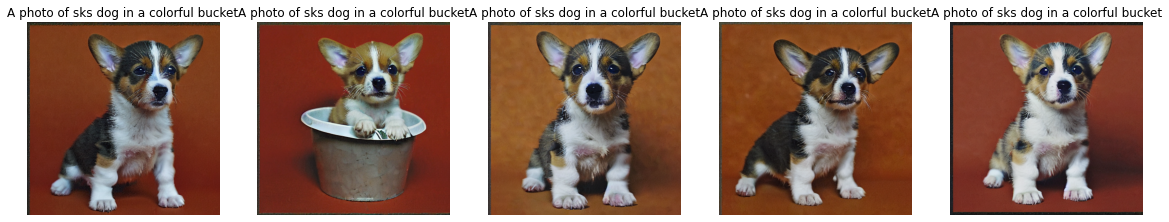

In [5]:
unique_id = "sks"
class_label = "dog"
prompt = f"A photo of {unique_id} {class_label} in a colorful bucket"

num_image_gen = 5
steps = 75
ugs = 15
images = dreambooth_model.text_to_image(
    prompt,
    batch_size=num_image_gen,
    num_steps=steps,
    unconditional_guidance_scale=ugs,
)

plot_images(images, prompt)